결측치를 채우고 3년 이상을 볼 것 vs 3년이상 중을 볼 것 (우선 후자 선택)

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

get_font_family()

font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use('ggplot')
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [12]:
pd.options.display.float_format = '{:.0f}'.format
# pd.reset_option('display.float_format

In [13]:
df = pd.read_csv('./data/company_nps_data.csv', encoding='cp949', dtype={'년도':str, '월':str})
# 연월 추가
for i in range(1, 10):
    df.loc[df['월']==f'{i}','월'] = f'0{i}'
df['연월'] = df['년도'] + '-' + df['월']

#년도, 월 다시 int값으로
for i in range(2015, 2020):
    df.loc[df['년도']==f'{i}','년도'] = i
for i in range(1, 10):
    df.loc[df['월']==f'0{i}','월'] = i
for i in range(10, 13):
    df.loc[df['월']==f'{i}','월'] = i
    
# 평균월급 feature
df['평균월급']=df['월별_연금보험료']*100/9/df['월별_직원수']
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월,평균월급
0,233757,41688077,2018,7,8912380,36,2018-07,2750735
1,123464,1760695,2018,3,942380,5,2018-03,2094178
2,342124,3221341,2018,7,781180,4,2018-07,2169944
3,386420,4815584,2015,11,3795900,14,2015-11,3012619
4,129243,9799736,2018,10,40724680,151,2018-10,2996665
...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,2017-02,2427010
99797,239388,1045021,2018,10,1428800,9,2018-10,1763951
99798,272304,181898,2018,3,392560,4,2018-03,1090444
99799,362194,2100218,2018,12,874780,3,2018-12,3239926


In [14]:
len_dict = {} # 기간 별 회사 수
id_dict = {} # 기간 별 회사들
df_by_id = df.groupby('회사ID')
for co_id, tmp in df_by_id:
    if id_dict.get(tmp.shape[0]):
        id_dict[tmp.shape[0]].append(co_id)
    else:
        id_dict[tmp.shape[0]] = [co_id]
    len_dict[tmp.shape[0]] = len_dict.get(tmp.shape[0], 0) + 1
    
# id_dict  : key → 데이터 기간, value → 해당 기간의 회사들   
# len_dict : key → 데이터 기간, value → 회사 개수  


In [29]:
## 36개월 이상인 기업의 수
candidates_co =[]  # 해당 기업들
for i in range(32, 51):
    if i in id_dict: 
        candidates_co.extend(id_dict[i])

candi = df.loc[df['회사ID'].isin(candidates_co)]['회사ID'].unique()
candi.sort()

df_dict = {}
for i in candi:
    df_dict[i] = df_by_id.get_group(i).sort_values(['년도','월'])

In [6]:
df_dict.keys()

dict_keys([14271, 59533, 122968, 123082, 123219, 123235, 123464, 123649, 123882, 124181, 124281, 124386, 124388, 124463, 124918, 125197, 125878, 125958, 125987, 126282, 126521, 126538, 126606, 126664, 126674, 126772, 126802, 126814, 126831, 126983, 127060, 127065, 127090, 127142, 127180, 127202, 127366, 127503, 127511, 127669, 127732, 127839, 128076, 128149, 128174, 128264, 128405, 128415, 128440, 128485, 128488, 128539, 128638, 128723, 128896, 128916, 129184, 129243, 129310, 129370, 129377, 129436, 129486, 129633, 129652, 129718, 129774, 129828, 129861, 129895, 130023, 130084, 130128, 130191, 130203, 130261, 130281, 130322, 130344, 130386, 130387, 130428, 130577, 130647, 130729, 130756, 130899, 130911, 130927, 130966, 131049, 131114, 131228, 131293, 131312, 131345, 131397, 131440, 131485, 131606, 131635, 131723, 131872, 131916, 132029, 132056, 132156, 132164, 132219, 132335, 132345, 132359, 132457, 132513, 132623, 132760, 132841, 132864, 132930, 133019, 133041, 133175, 133298, 133348,

In [30]:
# 6개월간의 평균 직원수(결측 달이 있는 경우 달의 개수로 나눠준다.)
상반기 = [1, 2, 3, 4, 5, 6]
하반기 = [7, 8, 9, 10, 11, 12]
for key in df_dict:
    tmp_df = df_dict[key]
    tmp_gp = tmp_df.groupby(['년도'])
    i = 0
    for year, df_year in tmp_gp:
        상반기_조건 = (tmp_df['년도'] == year) & (tmp_df['월'].isin(상반기))
        하반기_조건 = (tmp_df['년도'] == year) & (tmp_df['월'].isin(하반기))
        tmp_df.loc[상반기_조건, '반기_평균_직원수'] = np.round(tmp_df.loc[상반기_조건, '월별_직원수'].mean())
        tmp_df.loc[상반기_조건, '반기'] = '상반기'
    
        tmp_df.loc[하반기_조건, '반기_평균_직원수'] = np.round(tmp_df.loc[하반기_조건, '월별_직원수'].mean())
        tmp_df.loc[하반기_조건, '반기'] = '하반기'
    df_dict[key] = tmp_df

In [31]:
# # 평균 매출 250억 이상 & 2019년 12월에 직원수 40명 이상
candi = []
for key in df_dict:
    df_tmp = df_dict[key]
    if 10**(-5)*np.mean(df_tmp['연매출액'])<250:
        if df_tmp.tail(1)['월별_직원수'].values[0] >= 40:
    candi.append(key)
print(candi)
print(f'평균 매출 250억 이상이고 존재 데이터의 마지막 달에 직원 수가 40인 이상 : {len(candi)}')

[14271, 59533, 122968, 123082, 123219, 123235, 123464, 123649, 123882, 124181, 124281, 124386, 124388, 124463, 124535, 124918, 125197, 125878, 125958, 125987, 126282, 126521, 126538, 126606, 126664, 126674, 126772, 126802, 126814, 126831, 126983, 127060, 127065, 127090, 127142, 127180, 127202, 127366, 127503, 127511, 127669, 127732, 127839, 128076, 128149, 128174, 128264, 128405, 128415, 128440, 128485, 128488, 128539, 128638, 128723, 128896, 128916, 129184, 129243, 129310, 129370, 129377, 129436, 129486, 129633, 129652, 129718, 129774, 129828, 129861, 129895, 130023, 130084, 130128, 130191, 130203, 130261, 130281, 130322, 130344, 130386, 130387, 130428, 130577, 130647, 130729, 130756, 130899, 130911, 130927, 130966, 131049, 131114, 131228, 131293, 131312, 131345, 131397, 131440, 131485, 131606, 131635, 131723, 131872, 131916, 132029, 132056, 132156, 132164, 132219, 132335, 132345, 132359, 132457, 132513, 132623, 132760, 132841, 132864, 132930, 133019, 133041, 133175, 133298, 133348, 1

In [18]:
매출표 = pd.DataFrame(columns = ['회사ID',2015, 2016, 2017, 2018,2019])
for co_id in candi:
    tmp_df = df_dict[co_id]
    data = {'회사ID':co_id,2015:np.nan, 2016:np.nan, 2017:np.nan, 2018:np.nan, 2019:np.nan}
    
    if sum(tmp_df['년도'].isin([2015])):
        val1 = tmp_df.loc[tmp_df['년도']==2015, '연매출액'].unique()[0]
        data[2015] = val1
    if sum(tmp_df['년도'].isin([2016])):
        val1 = tmp_df.loc[tmp_df['년도']==2016, '연매출액'].unique()[0]
        data[2016] = val1
    if sum(tmp_df['년도'].isin([2017])):
        val1 = tmp_df.loc[tmp_df['년도']==2017, '연매출액'].unique()[0]
        data[2017] = val1
    if sum(tmp_df['년도'].isin([2018])):
        val1 = tmp_df.loc[tmp_df['년도']==2018, '연매출액'].unique()[0]
        data[2018] = val1
    if sum(tmp_df['년도'].isin([2019])):
        val1 = tmp_df.loc[tmp_df['년도']==2019, '연매출액'].unique()[0]
        data[2019] = val1
    매출표 = 매출표.append(data, ignore_index=True)
매출표

,회사ID,2015,2016,2017,2018,2019
0,14271,1199495,4257715,5005248,8388401,9039340
1,59533,194704,207762,124299,144614,NaN
2,122968,37415377,26858719,32997924,31514468,NaN
3,123082,NaN,6765218,6638972,6001508,NaN
4,123219,NaN,3754186,3934187,3699796,NaN
...,...,...,...,...,...,...
1122,512308,5729251,3443232,4773439,3562376,NaN
1123,513218,NaN,2529141,2482268,2630253,NaN
1124,514152,2257227,2088582,2587546,2578014,NaN
1125,514934,NaN,384313,422440,556216,NaN


In [ ]:
# 결측치 채우기
y, x = 매출표.shape
for i in range(y):
    tmp = 매출표.loc[i].isnull()
    if (tmp[2016]==True) and (tmp[2015]==False) and (tmp[2017]==False): 
        매출표.loc[i,2016] = (매출표.loc[i,2015] + 매출표.loc[i,2017])/2
    if (tmp[2017]==True) and (tmp[2016]==False) and (tmp[2018]==False):
        매출표.loc[i,2017] = (매출표.loc[i,2016] + 매출표.loc[i,2018])/2
    if (tmp[2018]==True) and (tmp[2017]==False) and (tmp[2019]==False):
        매출표.loc[i,2017] = (매출표.loc[i,2016] + 매출표.loc[i,2018])/2
매출표

In [ ]:
# 열 추가
매출표['to_2016'] = np.nan
매출표['to_2017'] = np.nan
매출표['to_2018'] = np.nan
매출표['to_2019'] = np.nan
매출표

In [29]:
y, x = 매출표.shape
for i in range(y):
    tmp = 매출표.loc[i].isnull()
    if (tmp[2016]==False) and (tmp[2015]==False): 
        val1, val2 = 매출표.loc[i,2015], 매출표.loc[i,2016]
        매출표.loc[i,'to_2016'] = round((val2/val1-1)*100)
    if (tmp[2017]==False) and (tmp[2016]==False): 
        val1, val2 = 매출표.loc[i,2016], 매출표.loc[i,2017]
        매출표.loc[i,'to_2017'] = round((val2/val1-1)*100)
    if (tmp[2018]==False) and (tmp[2017]==False): 
        val1, val2 = 매출표.loc[i, 2017], 매출표.loc[i, 2018]
        매출표.loc[i,'to_2018'] = round((val2/val1-1)*100)
    if (tmp[2019]==False) and (tmp[2018]==False): 
        val1, val2 = 매출표.loc[i,2018], 매출표.loc[i,2019]
        매출표.loc[i,'to_2019'] = round((val2/val1-1)*100)
매출표

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019
0,233757,9835158,30229862,34398681,41688077,nan,207,14,21,nan
1,123464,nan,1853170,1647383,1760695,nan,nan,-11,7,nan


In [30]:
# 매출표 행추가
매출표['마지막_연도'] = np.nan
매출표['마지막_연도_매출액'] = np.nan
매출표['3년_매출_성장률'] = np.nan
매출표['마지막_증가액'] = np.nan
매출표

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019,마지막_연도,마지막_연도_매출액,3년_매출_성장률,마지막_증가액
0,233757,9835158,30229862,34398681,41688077,nan,207,14,21,nan,nan,nan,nan,nan
1,123464,nan,1853170,1647383,1760695,nan,nan,-11,7,nan,nan,nan,nan,nan


In [31]:
# 매출표 분석 3년_매출_성장률

y, x = 매출표.shape
for i in range(y):
    flags = 매출표.loc[i, ['to_2016', 'to_2017', 'to_2018', 'to_2019']].notnull().tolist()
    if sum(flags[2:])==2:
        매출표.loc[i, '마지막_연도_매출액'] = 매출표.loc[i, 2019]
        매출표.loc[i, '마지막_연도'] = 2019
        매출표.loc[i, '3년_매출_성장률'] = round(매출표.loc[i, ['to_2017', 'to_2018', 'to_2019']].mean())
        매출표.loc[i, '마지막_증가액'] = 매출표.loc[i, 2019] - 매출표.loc[i, 2018]

    elif sum(flags[1:-1])==2:
        매출표.loc[i, '마지막_연도_매출액'] = 매출표.loc[i, 2018]
        매출표.loc[i, '마지막_연도'] = 2018
        매출표.loc[i, '3년_매출_성장률'] =round(매출표.loc[i, ['to_2016', 'to_2017', 'to_2018']].mean())
        매출표.loc[i, '마지막_증가액'] = 매출표.loc[i, 2018] - 매출표.loc[i, 2017]


    elif sum(flags[:2])==2:
        매출표.loc[i, '마지막_연도_매출액'] = 매출표.loc[i, 2017]
        매출표.loc[i, '마지막_연도'] = 2017
        매출표.loc[i, '3년_매출_성장률'] = round(매출표.loc[i, ['to_2015', 'to_2016', 'to_2017']].mean())
        매출표.loc[i, '마지막_증가액'] = 매출표.loc[i, 2017] - 매출표.loc[i, 2016]

매출표 = 매출표.dropna(subset=['마지막_연도'])
매출표

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019,마지막_연도,마지막_연도_매출액,3년_매출_성장률,마지막_증가액
0,233757,9835158,30229862,34398681,41688077,nan,207,14,21,nan,2018,41688077,81,7289396
1,123464,nan,1853170,1647383,1760695,nan,nan,-11,7,nan,2018,1760695,-2,113312


In [32]:
매출표 = 매출표[(매출표['3년_매출_성장률'] >= 20) |  (매출표['마지막_증가액'] >= 1000_0000)]

In [33]:
매출표

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019,마지막_연도,마지막_연도_매출액,3년_매출_성장률,마지막_증가액
0,233757,9835158,30229862,34398681,41688077,nan,207,14,21,nan,2018,41688077,81,7289396
1,123464,nan,1853170,1647383,1760695,nan,nan,-11,7,nan,2018,1760695,-2,113312


In [34]:
매출표.shape

(2, 14)

In [35]:
candi = 매출표['회사ID'].tolist()

In [32]:
# 직원 수
# 2015년 11월 ~ 2019년 12월
날짜 = df.sort_values(['년도','월'])['연월'].unique().tolist()
날짜.insert(0, '회사ID')
직원표 = pd.DataFrame(columns = 날짜)

for co_id in candi:
    data = {x:np.nan for x in 날짜}
    data['회사ID'] = co_id
    tmp_df = df_dict[co_id]
    for a, b in zip(tmp_df['연월'], tmp_df['월별_직원수']):
        data[a] = b
    직원표 = 직원표.append(data, ignore_index=True)
        
직원표        

,회사ID,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,14271,11,15,15,14,13,13,12,13,14,...,21,21,22,24,24,23,23,22,23,23
1,59533,5,5,5,6,6,6,6,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122968,88,88,73,72,73,79,82,74,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123082,NaN,NaN,28,27,28,28,27,30,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,123219,NaN,NaN,15,15,15,15,15,16,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,513218,NaN,NaN,8,10,9,7,8,8,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1147,514152,9,9,9,9,9,9,9,9,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1148,514934,NaN,NaN,6,6,6,6,6,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,515264,NaN,NaN,5,5,5,5,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 평균 직원 수
상반기 = [1, 2, 3, 4, 5, 6]
하반기 = [7, 8, 9, 10, 11, 12]
평균_직원표 = pd.DataFrame(columns = ['회사ID']+ [f'{i}_'+ s + '반기' for i in range(2015, 2020) for s in ['상', '하']])
for co_id in candi:
    data = {f'{i}_'+ s + '반기' : np.nan for i in range(2015, 2020) for s in ['상', '하']}
    data['회사ID'] = co_id
    tmp_df = df_dict[co_id]
    tmp_gp = tmp_df.groupby(['년도'])
    for year, df_year in tmp_gp:
        상반기_조건 = (tmp_df['년도'] == year) & (tmp_df['월'].isin(상반기))
        하반기_조건 = (tmp_df['년도'] == year) & (tmp_df['월'].isin(하반기))
        data[f'{year}_상반기'] =  np.round(tmp_df.loc[상반기_조건, '월별_직원수'].mean())
        data[f'{year}_하반기'] =  np.round(tmp_df.loc[하반기_조건, '월별_직원수'].mean())
    평균_직원표 = 평균_직원표.append(data, ignore_index=True)

평균_직원표

,회사ID,2015_상반기,2015_하반기,2016_상반기,2016_하반기,2017_상반기,2017_하반기,2018_상반기,2018_하반기,2019_상반기,2019_하반기
0,14271,nan,13,13,16,16,18,18,22,22,23
1,59533,nan,5,6,6,5,5,5,6,nan,nan
2,122968,nan,88,76,77,71,71,66,67,nan,nan
3,123082,nan,nan,28,29,26,25,21,21,nan,nan
4,123219,nan,nan,15,16,16,19,14,12,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
1146,513218,nan,nan,8,8,9,10,12,10,nan,nan
1147,514152,nan,9,9,9,9,10,10,11,nan,nan
1148,514934,nan,nan,6,6,5,6,6,7,nan,nan
1149,515264,nan,nan,5,5,5,5,5,5,nan,nan


In [34]:
평균_직원표['2015to2016'] = (평균_직원표['2016_상반기'] - 평균_직원표['2015_하반기'])/평균_직원표['2015_하반기']*100
평균_직원표['2016상to2016하'] = (평균_직원표['2016_하반기'] - 평균_직원표['2016_상반기'])/평균_직원표['2016_상반기']*100
평균_직원표['2016to2017'] = (평균_직원표['2017_상반기'] - 평균_직원표['2016_하반기'])/평균_직원표['2016_하반기']*100
평균_직원표['2017상to2017하'] = (평균_직원표['2017_하반기'] - 평균_직원표['2017_상반기'])/평균_직원표['2017_상반기']*100
평균_직원표['2017to2018'] = (평균_직원표['2018_상반기'] - 평균_직원표['2017_하반기'])/평균_직원표['2017_하반기']*100
평균_직원표['2018상to2018하'] = (평균_직원표['2018_하반기'] - 평균_직원표['2018_상반기'])/평균_직원표['2018_상반기']*100
평균_직원표['2018to2019'] = (평균_직원표['2019_상반기'] - 평균_직원표['2018_하반기'])/평균_직원표['2018_하반기']*100
평균_직원표['2019상to2019하'] = (평균_직원표['2019_하반기'] - 평균_직원표['2019_상반기'])/평균_직원표['2019_상반기']*100
평균_직원표

,회사ID,2015_상반기,2015_하반기,2016_상반기,2016_하반기,2017_상반기,2017_하반기,2018_상반기,2018_하반기,2019_상반기,2019_하반기,2015to2016,2016상to2016하,2016to2017,2017상to2017하,2017to2018,2018상to2018하,2018to2019,2019상to2019하
0,14271,nan,13,13,16,16,18,18,22,22,23,0,23,0,12,0,22,0,5
1,59533,nan,5,6,6,5,5,5,6,nan,nan,20,0,-17,0,0,20,nan,nan
2,122968,nan,88,76,77,71,71,66,67,nan,nan,-14,1,-8,0,-7,2,nan,nan
3,123082,nan,nan,28,29,26,25,21,21,nan,nan,nan,4,-10,-4,-16,0,nan,nan
4,123219,nan,nan,15,16,16,19,14,12,nan,nan,nan,7,0,19,-26,-14,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,513218,nan,nan,8,8,9,10,12,10,nan,nan,nan,0,12,11,20,-17,nan,nan
1147,514152,nan,9,9,9,9,10,10,11,nan,nan,0,0,0,11,0,10,nan,nan
1148,514934,nan,nan,6,6,5,6,6,7,nan,nan,nan,0,-17,20,0,17,nan,nan
1149,515264,nan,nan,5,5,5,5,5,5,nan,nan,nan,0,0,0,0,0,nan,nan


In [22]:
평균_직원표['2016-2018_평균'] = 평균_직원표[['2016상to2016하', '2016to2017', '2017상to2017하', '2017to2018', '2018상to2018하']].mean(axis=1)

In [35]:
평균_직원표['2015-2019_평균'] =  평균_직원표[['2015to2016', '2016상to2016하', '2016to2017', '2017상to2017하', '2017to2018', '2018상to2018하', '2018to2019', '2019상to2019하']].mean(axis=1)

In [23]:
# 평균_직원표[평균_직원표['2016-2018_평균']>=10]

,회사ID,2015_상반기,2015_하반기,2016_상반기,2016_하반기,2017_상반기,2017_하반기,2018_상반기,2018_하반기,2019_상반기,2019_하반기,2015to2016,2016상to2016하,2016to2017,2017상to2017하,2017to2018,2018상to2018하,2018to2019,2019상to2019하,2016-2018_평균
0,129633,nan,11,12,16,56,97,120,133,nan,nan,9,33,250,73,24,11,nan,nan,78
2,131606,nan,42,45,50,63,86,92,92,nan,nan,7,11,26,37,7,0,nan,nan,16
10,135559,nan,27,32,44,46,50,56,72,nan,nan,19,38,5,9,12,29,nan,nan,18
11,136269,nan,23,27,36,41,43,52,50,nan,nan,17,33,14,5,21,-4,nan,nan,14
12,136290,nan,22,25,35,40,45,51,58,nan,nan,14,40,14,12,13,14,nan,nan,19
13,137755,nan,nan,5,27,40,50,45,46,nan,nan,nan,440,48,25,-10,2,nan,nan,101
19,296209,nan,30,31,37,63,66,71,72,nan,nan,3,19,70,5,8,1,nan,nan,21
23,405759,nan,nan,8,9,19,32,38,44,nan,nan,nan,12,111,68,19,16,nan,nan,45
27,470994,nan,nan,7,6,84,86,88,85,nan,nan,nan,-14,1300,2,2,-3,nan,nan,257


In [37]:
# tmp_list = list(set([123156, 127503, 130344, 127669, 381344, 420165, 294367, 294337, 294530, 440094,
#            127503, 420165, 130344, 132156, 132164, 470994, 268810, 380843, 394749, 233340, 472629,
#            403470, 420046, 420165, 420304, 469677,129633, 132029, 135559, 136290, 470994]))
# 평균_직원표.loc[평균_직원표['회사ID'].isin(tmp_list), ['회사ID', '2015-2019_평균']].sort_values('2015-2019_평균')

,회사ID,2015-2019_평균
986,420165,3
987,420304,3
684,294367,3
983,420046,4
874,381344,4
79,130344,5
40,127669,6
108,132164,7
686,294530,7
1092,469677,8


In [24]:
# 직원성장률 8
직원기준 = 평균_직원표.loc[평균_직원표['2016-2018_평균']>=8, '회사ID'].tolist()

In [25]:
날짜 = df.sort_values(['년도','월'])['연월'].unique().tolist()
날짜.insert(0, '회사ID')
월급표 = pd.DataFrame(columns = 날짜)

for co_id in candi:
    data = {x:np.nan for x in 날짜}
    data['회사ID'] = co_id
    tmp_df = df_dict[co_id]
    for a, b in zip(tmp_df['연월'], tmp_df['평균월급']):
        data[a] = b    
    월급표 = 월급표.append(data, ignore_index=True)
        
월급표      

,회사ID,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,129633,1641495,1616505,1616505,1694578,1813253,1688137,1816984,1858311,1885278,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,130966,2534844,2538713,2546249,2517593,2516399,2481860,2487558,2454268,2618281,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,131606,1816924,1841702,1851892,1835590,1831806,1757731,1732776,1732582,1805829,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,132029,2744162,2756701,2724079,2709141,2736690,2754881,2727837,2775190,2776100,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,133041,nan,nan,2016536,2022567,2026823,2035306,2041881,2050680,2089575,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,133364,2171023,2149198,2112000,2079831,2126195,2175859,2157771,2168796,2275324,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,133518,2009116,2000605,1953642,1975065,1979533,1972702,1967457,1967457,2005280,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,134428,2861487,2886716,2908215,2829876,2840030,2856748,2856748,2892320,3096083,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,134599,3709081,3709081,3795397,3831480,3822017,3822017,3839063,3847690,3953886,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,135330,1996613,1889795,1885053,1894577,1913307,1911230,1895836,1857342,1987023,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [26]:
#평균_월급표
기준1 = ['2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06']
기준2 = ['2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06']
기준3 = ['2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06']
기준4 = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06']
기준5 = ['2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']
평균_월급표 = pd.DataFrame(columns = ['회사ID']+ [f'기준{i}' for i in range(1, 6)])
for co_id in candi:
    data = {f'기준{i}':np.nan for i in range(1, 6)}
    data['회사ID'] = co_id
    tmp_df = df_dict[co_id]
    cri1 = tmp_df['연월'].isin(기준1)
    cri2 = tmp_df['연월'].isin(기준2)
    cri3 = tmp_df['연월'].isin(기준3)
    cri4 = tmp_df['연월'].isin(기준4)
    cri5 = tmp_df['연월'].isin(기준5)
        
    data['기준1'] =  np.round(tmp_df.loc[cri1, '평균월급'].mean())
    data['기준2'] =  np.round(tmp_df.loc[cri2, '평균월급'].mean())
    data['기준3'] =  np.round(tmp_df.loc[cri3, '평균월급'].mean())
    data['기준4'] =  np.round(tmp_df.loc[cri4, '평균월급'].mean())
    data['기준5'] =  np.round(tmp_df.loc[cri5, '평균월급'].mean())

    평균_월급표 = 평균_월급표.append(data, ignore_index=True)

평균_월급표

,회사ID,기준1,기준2,기준3,기준4,기준5
0,129633,1718221,1703793,1401521,1944096,nan
1,130966,2509685,2579337,2565912,2714895,nan
2,131606,1800125,1772157,1716564,1890017,nan
3,132029,2741085,2704747,3094923,3471061,nan
4,133041,2032299,2115770,2273850,2490379,nan
5,133364,2142584,2238945,2353345,2441911,nan
6,133518,1978197,2014776,2262792,2497924,nan
7,134428,2866518,2991220,3066715,3529466,nan
8,134599,3796978,3903944,4051954,4168632,nan
9,135330,1905469,2065112,2263805,2381357,nan


In [27]:
평균_월급표['1to2'] = (평균_월급표['기준2']/평균_월급표['기준1'] - 1)*100
평균_월급표['2to3'] = (평균_월급표['기준3']/평균_월급표['기준2'] - 1)*100
평균_월급표['3to4'] = (평균_월급표['기준4']/평균_월급표['기준3'] - 1)*100
평균_월급표['4to5'] = (평균_월급표['기준5']/평균_월급표['기준4'] - 1)*100
평균_월급표['평균'] = 평균_월급표[['1to2', '2to3', '3to4', '4to5']].mean(axis=1)


In [28]:
평균_월급표

,회사ID,기준1,기준2,기준3,기준4,기준5,1to2,2to3,3to4,4to5,평균
0,129633,1718221,1703793,1401521,1944096,nan,-1,-18,39,nan,7
1,130966,2509685,2579337,2565912,2714895,nan,3,-1,6,nan,3
2,131606,1800125,1772157,1716564,1890017,nan,-2,-3,10,nan,2
3,132029,2741085,2704747,3094923,3471061,nan,-1,14,12,nan,8
4,133041,2032299,2115770,2273850,2490379,nan,4,7,10,nan,7
5,133364,2142584,2238945,2353345,2441911,nan,4,5,4,nan,4
6,133518,1978197,2014776,2262792,2497924,nan,2,12,10,nan,8
7,134428,2866518,2991220,3066715,3529466,nan,4,3,15,nan,7
8,134599,3796978,3903944,4051954,4168632,nan,3,4,3,nan,3
9,135330,1905469,2065112,2263805,2381357,nan,8,10,5,nan,8


In [29]:
# 월급 성장률 4.3
월급기준 = 평균_월급표.loc[평균_월급표['평균']>=4.3, '회사ID'].tolist()

In [30]:
ans = []
for x in 월급기준:
    if x in 직원기준:
        ans.append(x)

In [66]:
ans = [int(i) for i in ans]

In [32]:
평균_월급표[평균_월급표['회사ID'] ==470994]['기준1'].values[0]

2177806.0

In [60]:
def 월급_그래프(i):
    
    y1 = 월급표[월급표['회사ID']==i].values[:,1:].ravel()
    x1 = 월급표.columns[1:]
    
    tmp = 평균_월급표.loc[평균_월급표['회사ID'] ==i]
    
    x2 = 기준1 + 기준2 + 기준3 + 기준4 + 기준5
    y2 = [tmp['기준1'].values[0]]*len(기준1) + [tmp['기준2'].values[0]]*len(기준2)\
        + [tmp['기준3'].values[0]]*len(기준3) + [tmp['기준4'].values[0]]*len(기준4) + [tmp['기준5'].values[0]]*len(기준5)
    plt.figure(figsize=(10,4))
    plt.plot(x1, y1, 'bo--', x2, y2, 'r-')
    plt.xticks(rotation=45)
    plt.xlabel('연월')
    plt.ylabel('월급')
    plt.title(f'{int(i)}의 월급 그래프')
    plt.show()
    
    
def 직원_그래프(i):
    if i in df_dict:
        df_tmp = df_dict[i]
    else:
        df_tmp = df[df['회사ID']== i].sort_values(['년도', '월'])
    plt.figure(figsize=(10,4))
    plt.plot(df_tmp['연월'], df_tmp['반기_평균_직원수'], 'b')
    plt.xticks(rotation=45)
    plt.xlabel('연월')
    plt.ylabel('반기별 평균 직원수')
    plt.title(f'{int(i)}의 직원 그래프')
    plt.show()
    
    
def 매출_그래프(i):
    if i in df_dict:
        df_tmp = df_dict[i]
    else:
        df_tmp = df[df['회사ID']== i].sort_values(['년도', '월'])
    plt.figure(figsize=(10,4))
    plt.plot(df_tmp['연월'], df_tmp['연매출액'], 'b')
    plt.xticks(rotation=45)
    plt.xlabel('연월')
    plt.ylabel('연매출액')
    plt.title(f'{int(i)}의 연매출 그래프')
    plt.show()


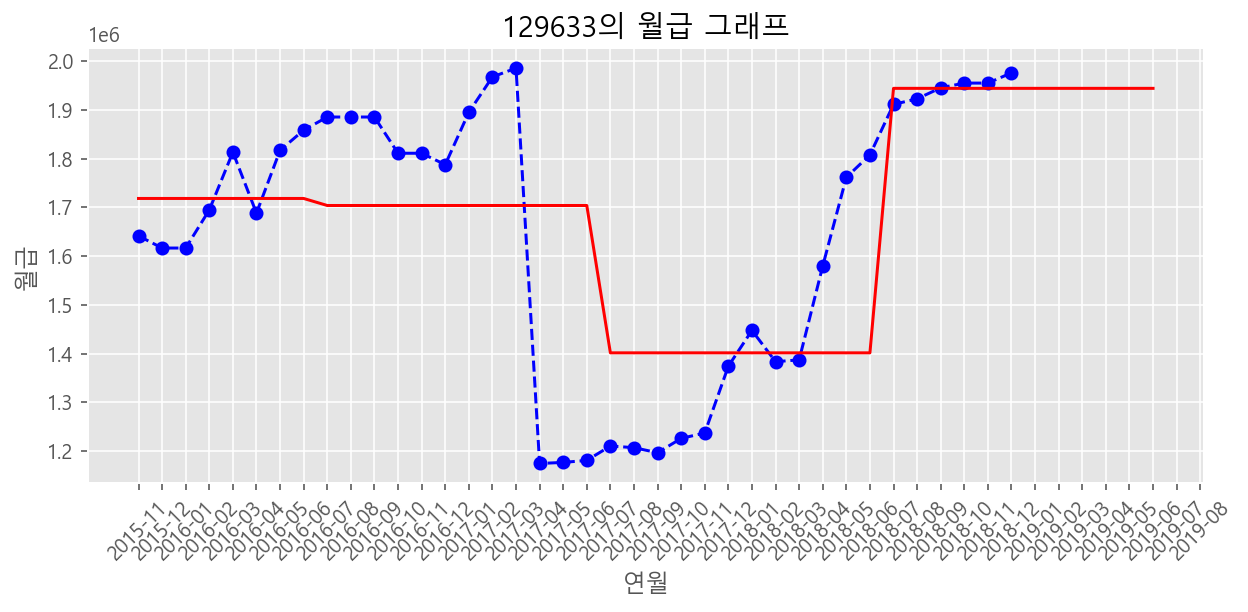

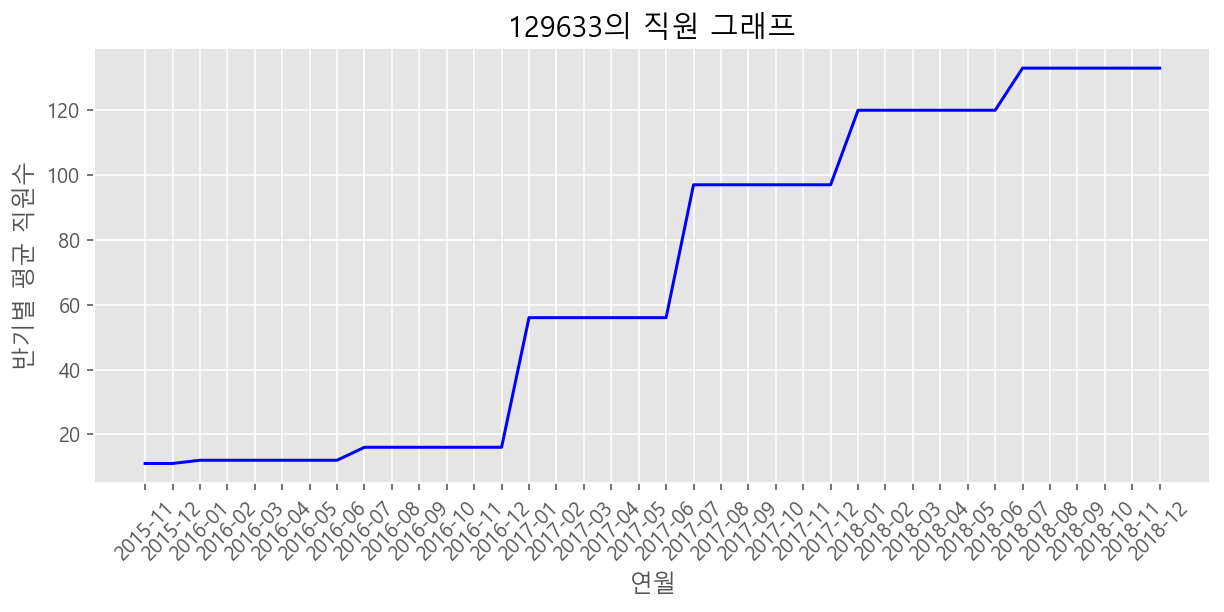

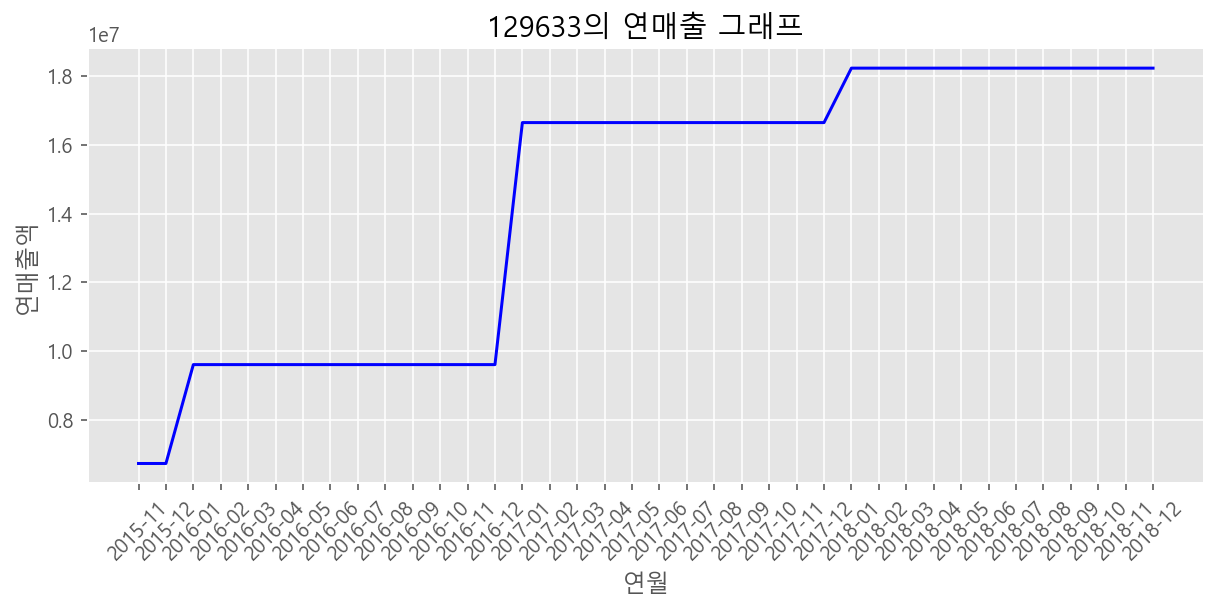

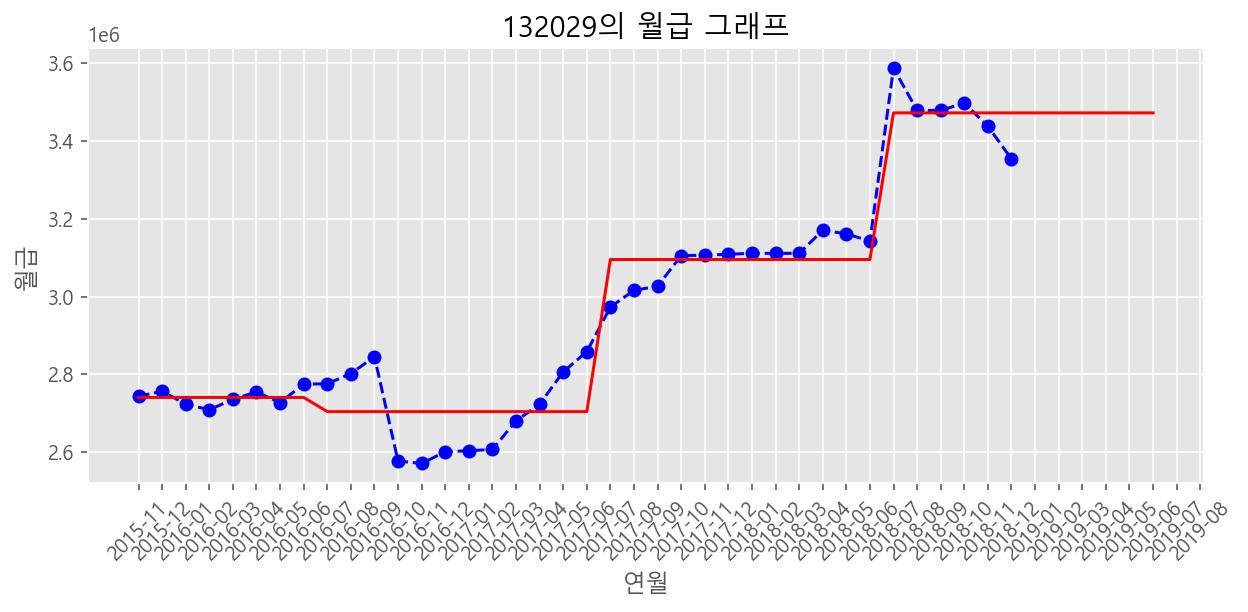

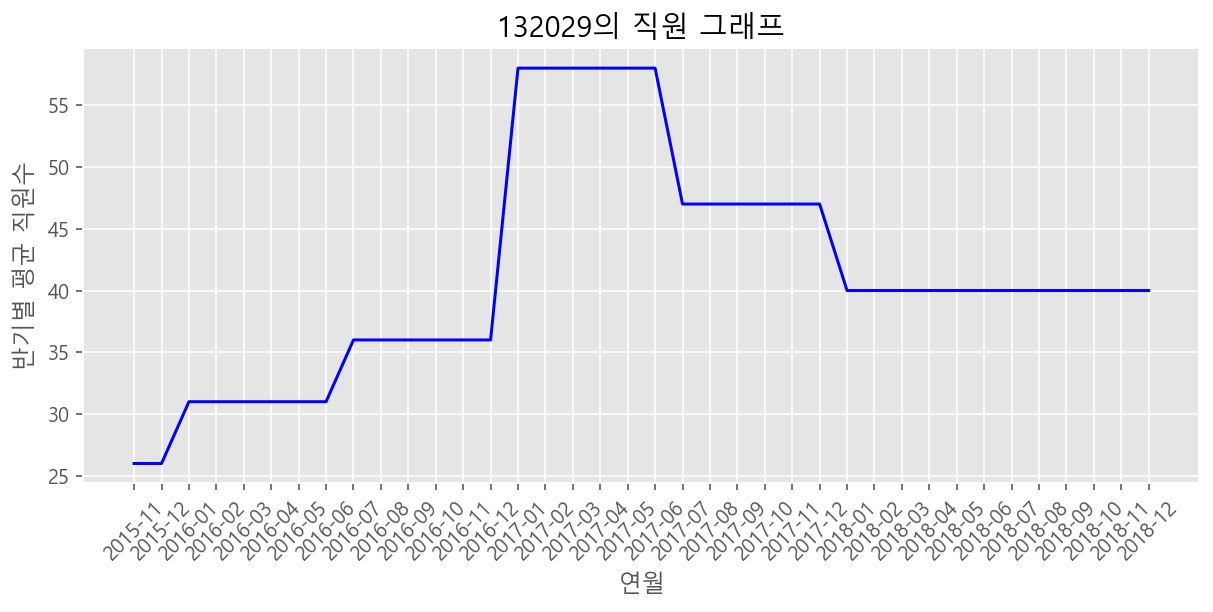

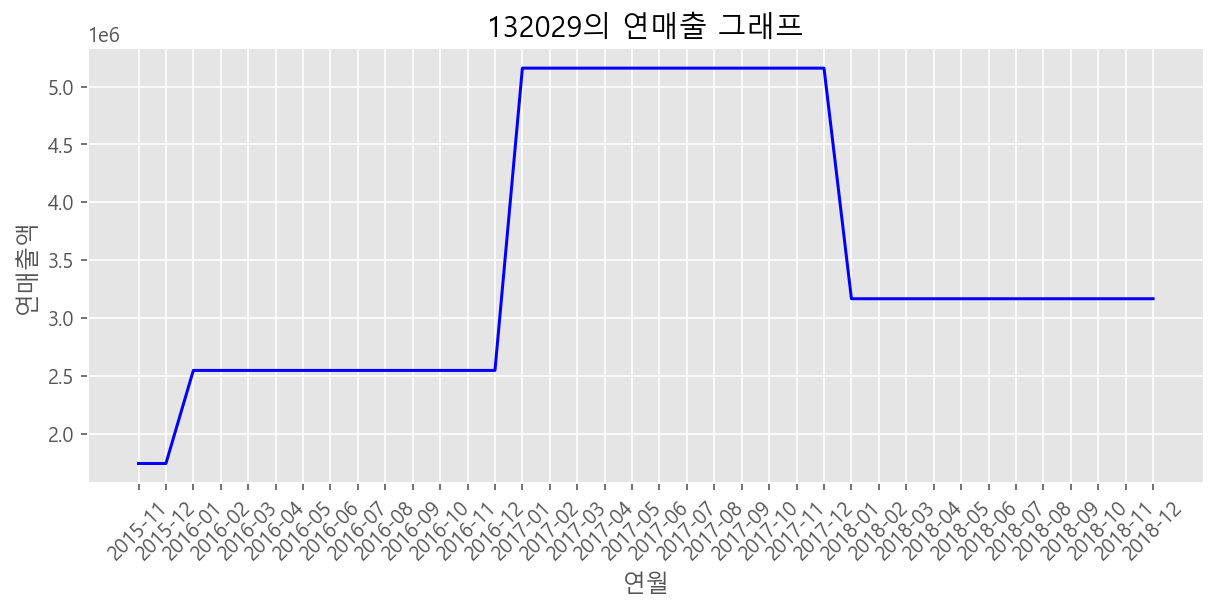

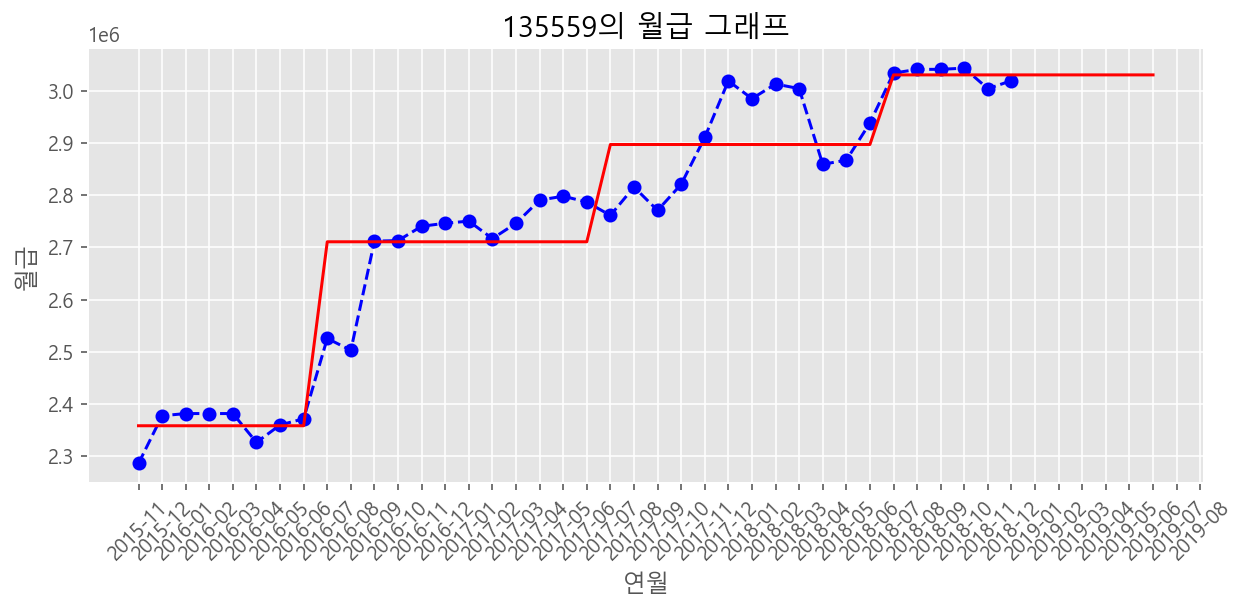

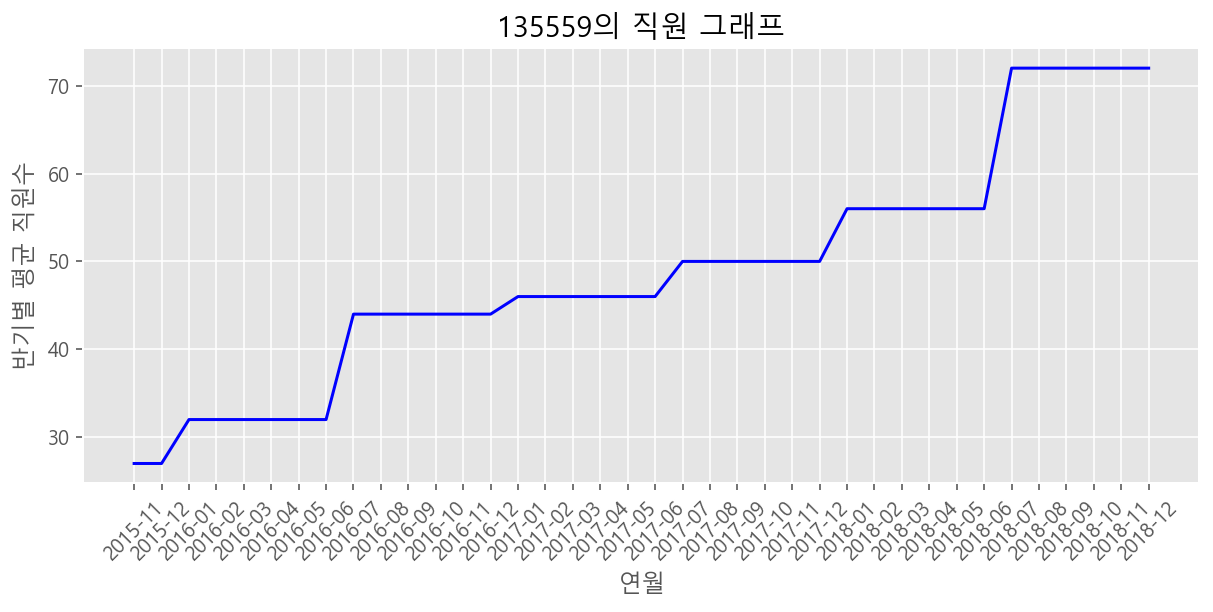

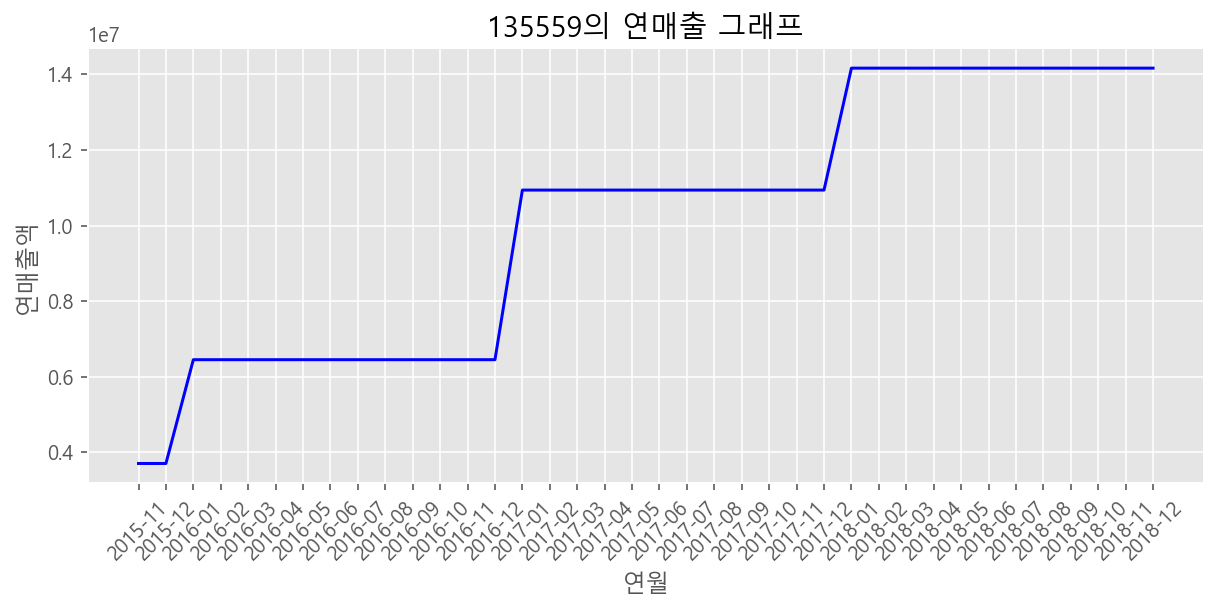

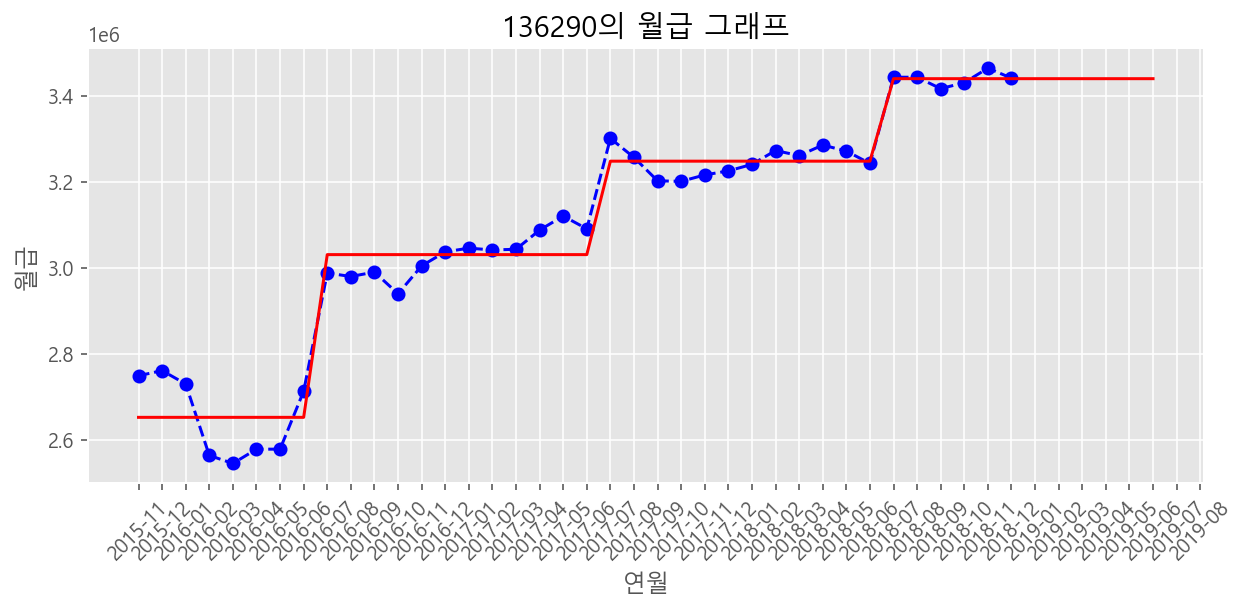

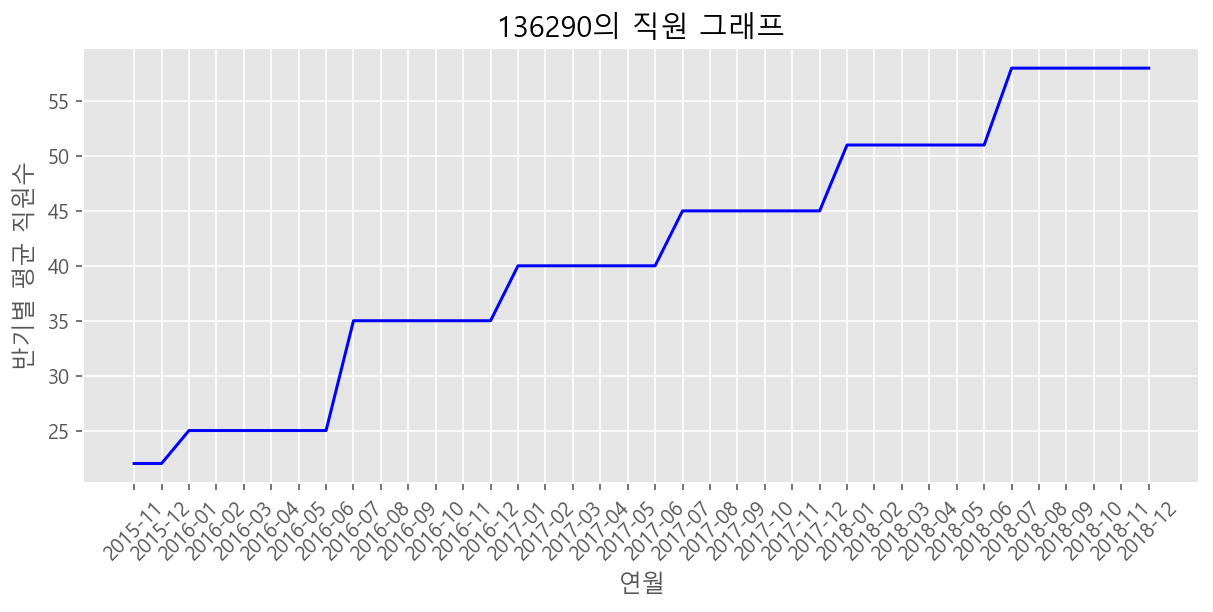

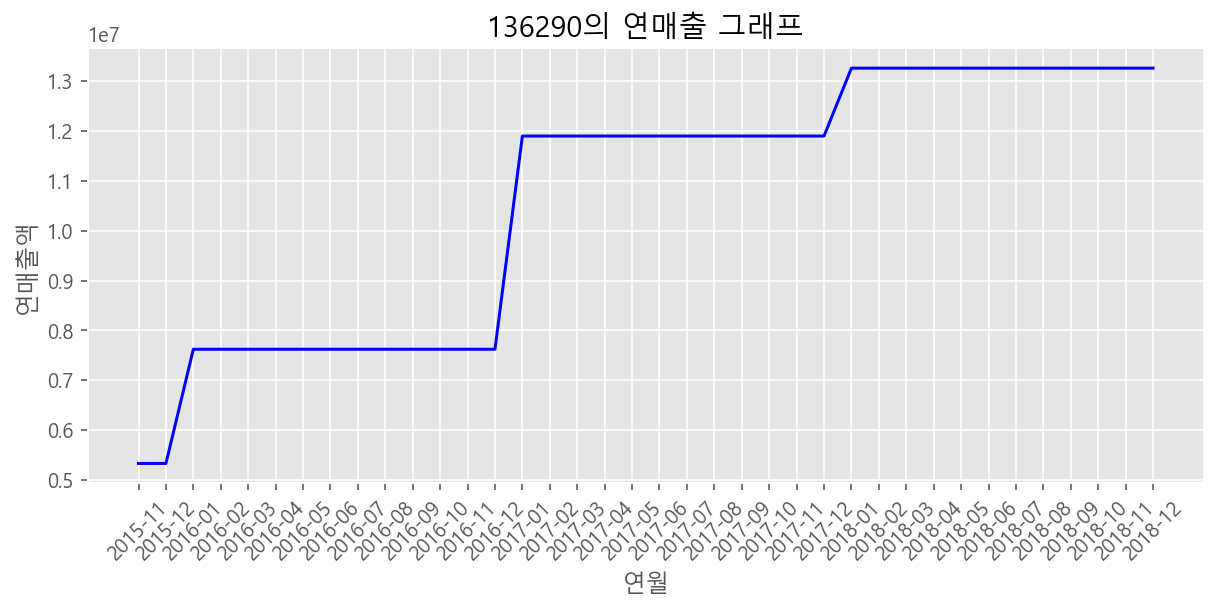

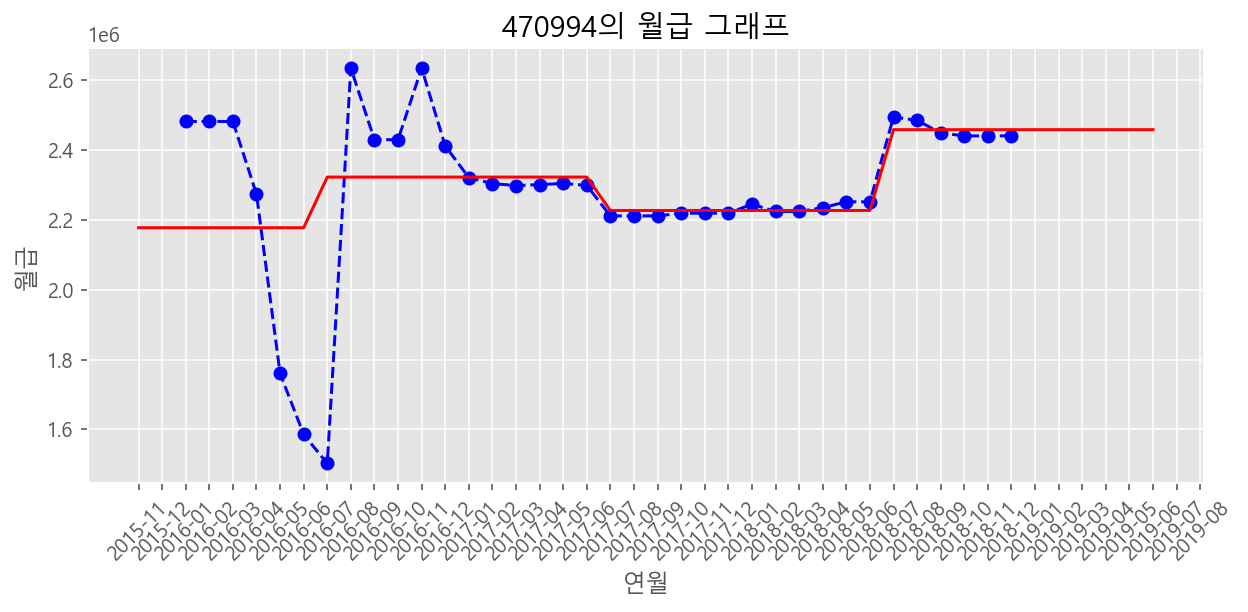

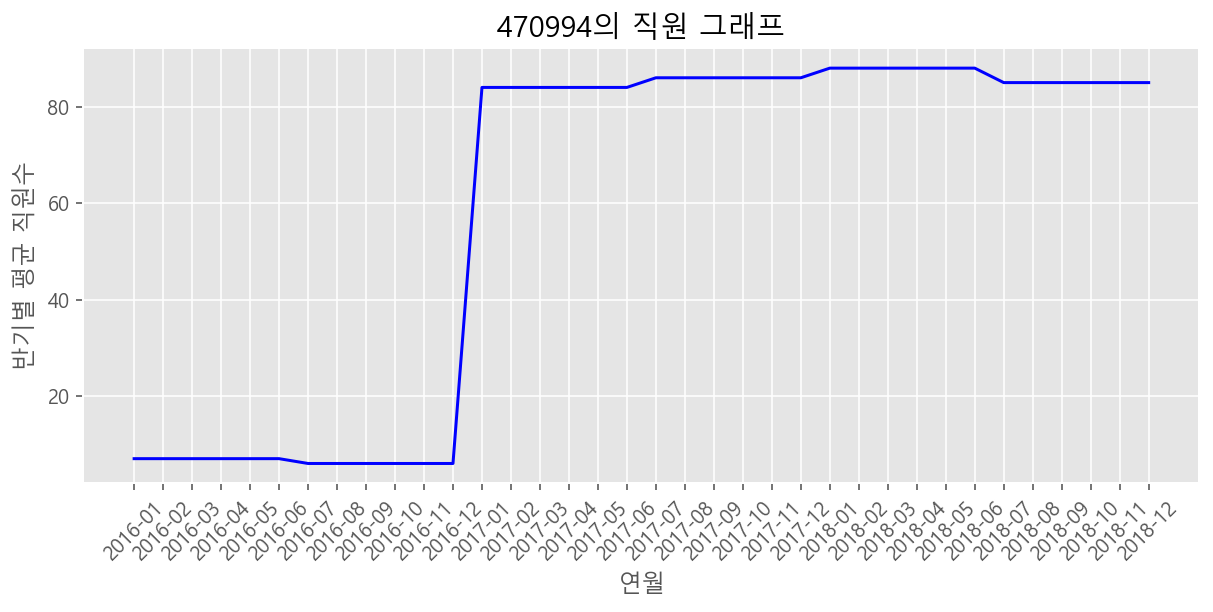

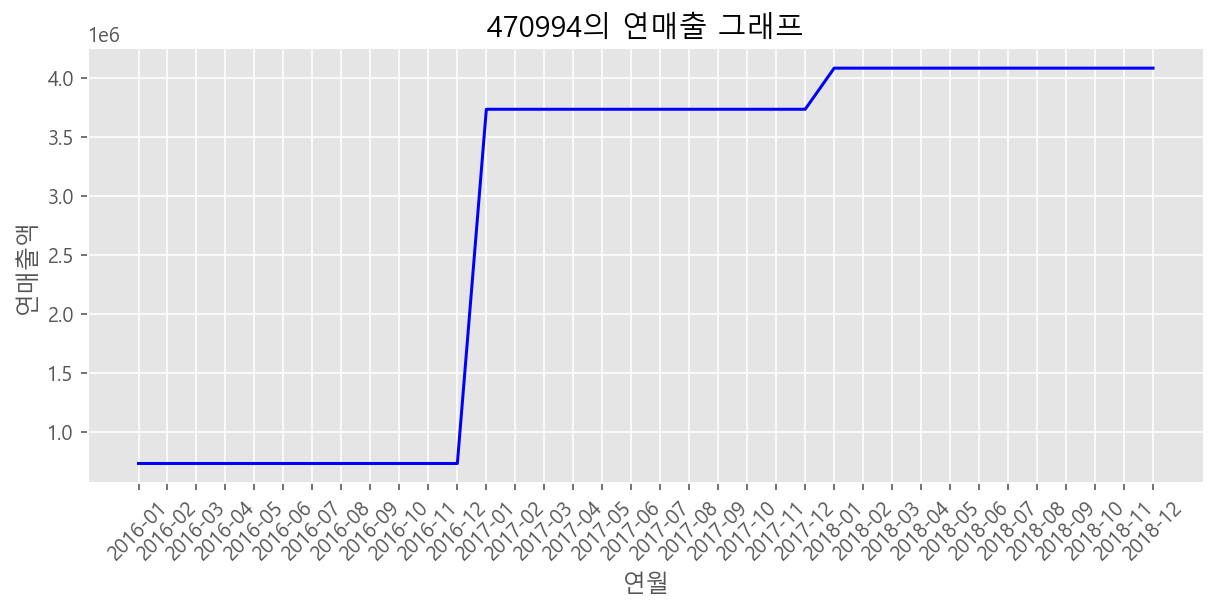

In [61]:
for i in ans:
    월급_그래프(i)
    직원_그래프(i)
    매출_그래프(i)

In [68]:
ans

[129633, 132029, 135559, 136290, 470994]

In [70]:
매출표.loc[매출표['회사ID'].isin(ans),:]

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019,마지막_연도,마지막_연도_매출액,3년_매출_성장률,마지막_증가액
1,129633,6741942,9612866,16640671,18221730,nan,43,73,10,nan,2018,18221730,42,1581059
13,132029,1742823,2547154,5159831,3166735,nan,46,103,-39,nan,2018,3166735,37,-1993096
44,135559,3703201,6449402,10937678,14164218,nan,74,70,29,nan,2018,14164218,58,3226540
48,136290,5335503,7623646,11894960,13255101,nan,43,56,11,nan,2018,13255101,37,1360141
126,470994,nan,729553,3733472,4082198,nan,nan,412,9,nan,2018,4082198,210,348726


In [98]:
A = 매출표.loc[매출표['회사ID'].isin(ans), ['회사ID', '3년_매출_성장률']]
A

,회사ID,3년_매출_성장률
1,129633,42
13,132029,37
44,135559,58
48,136290,37
126,470994,210


In [115]:
B = 평균_월급표.loc[평균_월급표['회사ID'].isin(ans),['회사ID','평균']]
B['평균월급증가율'] = B['평균']
B = B[['회사ID', '평균월급증가율']]
B

,회사ID,평균월급증가율
0,129633,7
3,132029,8
10,135559,9
12,136290,9
27,470994,4


In [111]:
평균_직원표
C = 평균_직원표.loc[평균_직원표['회사ID'].isin(ans), ['회사ID', '2016-2018_평균']]
C['평균_직원_증가율'] = C['2016-2018_평균']
C = C[['회사ID', '평균_직원_증가율']]
C

,회사ID,평균_직원_증가율
0,129633,78
3,132029,9
10,135559,18
12,136290,19
27,470994,257


In [116]:
merge = pd.merge(A, B, on='회사ID', how='inner')

In [118]:
merge = pd.merge(merge, C, on='회사ID', how='inner')

In [119]:
merge

,회사ID,3년_매출_성장률,평균월급증가율,평균_직원_증가율
0,129633,42,7,78
1,132029,37,8,9
2,135559,58,9,18
3,136290,37,9,19
4,470994,210,4,257
